In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, time

In [2]:
#Data PreProcessing
  #Parse JoiningDate as datetime
  #Calculate TenureInMonths

df = pd.read_json("employee_data.json")
df['JoiningDate'] = pd.to_datetime(df['JoiningDate'])
df['JoiningDate']

current_date = pd.to_datetime(date.today())
current_date
df['TenureInDays'] = current_date - df['JoiningDate']

In [3]:
#Analysis
  #Top Performers
  #Department-wise Summary

top_performers = df.sort_values(by=['TasksCompleted', 'HoursWorked', 'SatisfactionScore'], ascending=False)
top_performers[['EmployeeID', 'Name', 'Department', 'TasksCompleted', 'HoursWorked', 'SatisfactionScore']].head(10)

dept_summary = df.groupby('Department')[['TasksCompleted', 'HoursWorked', 'SatisfactionScore']].agg(['mean', 'sum']).round(2)
dept_summary

TasksCompleted       HoursWorked        SatisfactionScore       
                      mean   sum        mean    sum              mean    sum
Department                                                                  
Engineering          58.43   818       43.44  608.2              2.97  41.52
Finance              74.11  1408       44.12  838.3              2.79  52.98
HR                   74.00   962       39.40  512.2              3.47  45.06
Marketing            82.35  1647       40.74  814.7              2.58  51.67
Sales                75.00  1050       37.87  530.2              2.33  32.61
Support              80.45  1609       38.86  777.2              2.85  56.98

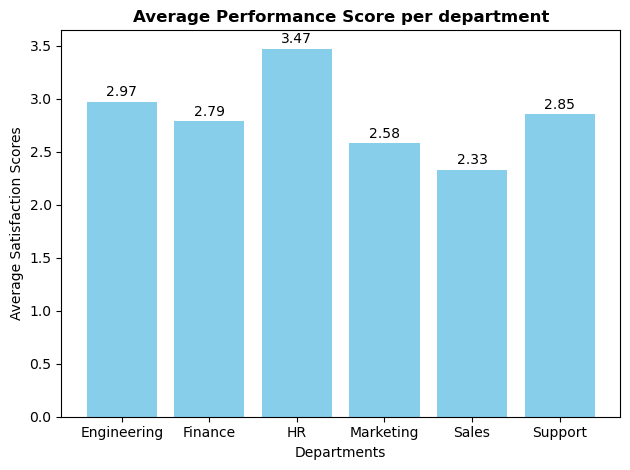

In [24]:
#Visualization
  #📊 Bar chart: Avg PerformanceScore per Department
  #🔥 Pie chart: Project load by department

avgPerformance = df.groupby('Department')['SatisfactionScore'].mean().round(2)
avgPerformance

plt.bar(avgPerformance.index, avgPerformance.values, color='skyblue')

for i in range (len(avgPerformance.index)):
    plt.text(i, avgPerformance.values[i] + 0.05, str(avgPerformance.values[i]), ha="center") 

plt.title("Average Performance Score per department", fontweight='bold')
plt.xlabel('Departments')
plt.ylabel('Average Satisfaction Scores')
plt.tight_layout()
plt.show()

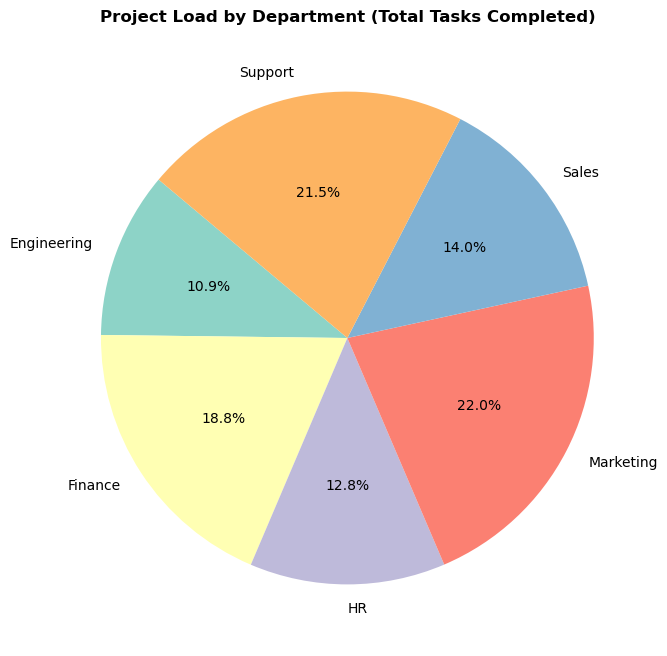

In [28]:
projectLoad = df.groupby('Department')['TasksCompleted'].sum()

plt.figure(figsize=(8,8))
plt.pie(projectLoad, labels=projectLoad.index,  autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Project Load by Department (Total Tasks Completed)', fontweight='bold')
plt.show()